In [77]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("datatattle/covid-19-nlp-text-classification")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\visha\.cache\kagglehub\datasets\datatattle\covid-19-nlp-text-classification\versions\1


In [79]:
import pandas as pd
df = pd.read_csv('Corona_NLP_train.csv',encoding='latin-1')
#df=df.sample(5000).reset_index(drop=True)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [83]:
df['OriginalTweet'][7]


"Was at the supermarket today. Didn't buy toilet paper. #Rebel\r\r\n\r\r\n#toiletpapercrisis #covid_19 https://t.co/eVXkQLIdAZ"

In [85]:
df['OriginalTweet'][5]

'As news of the regionÂ\x92s first confirmed COVID-19 case came out of Sullivan County last week, people flocked to area stores to purchase cleaning supplies, hand sanitizer, food, toilet paper and other goods, @Tim_Dodson reports https://t.co/cfXch7a2lU'

In [87]:
df.shape

(41157, 6)

In [89]:
df.Sentiment.value_counts(normalize=True)

Sentiment
Positive              0.277523
Negative              0.240955
Neutral               0.187404
Extremely Positive    0.160945
Extremely Negative    0.133173
Name: proportion, dtype: float64

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Text Classification
'''
Confusion matrix

precsion / recall / f1-score

auc-roc scores

accuracy

train data or test data

i have build a model having f1-score 0.7 .

'''

Text(0.5, 1.0, 'Sentiment Distribution')

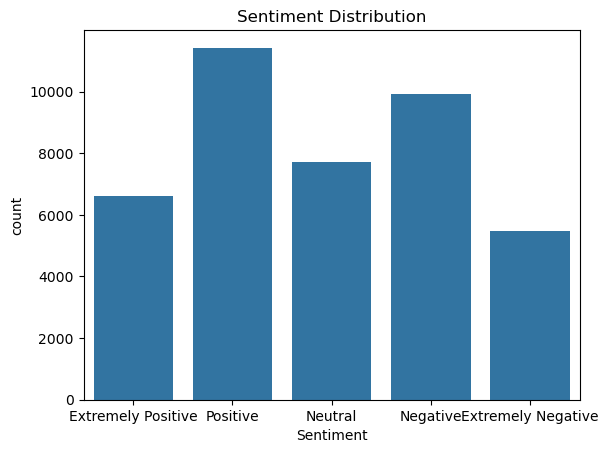

In [95]:


sns.countplot( data=df, x='Sentiment', order = ['Extremely Positive', 'Positive', 'Neutral', 'Negative', 'Extremely Negative'])
plt.title("Sentiment Distribution")

In [97]:
df=df.reset_index(drop=True)

In [99]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import PorterStemmer
import re 

stem=PorterStemmer()
corpus = []



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\visha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\visha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [101]:
corpus1 = []
text = df.OriginalTweet
for i in range(len(text)):

    r = re.sub('[^a-zA-Z]', ' ', text[i])

    r = r.lower()


    corpus1.append(r)


In [103]:
corpus = []
text = df.OriginalTweet
for i in range(len(corpus1)):
    r = corpus1[i].split(" ")
    r = [word for word in r if word not in stopwords.words('english')]
    r = [stem.stem(word) for word in r]
    r = " ".join(r)
    corpus.append(r)


In [104]:
df['text'] = corpus

df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,text
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,menyrbi phil gahan chrisitv http co ifz f...
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advic talk neighbour famili exchang phone numb...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,coronaviru australia woolworth give elderli ...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,food stock one empti pleas panic eno...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,readi go supermarket covid outbreak ...


In [115]:
dfs = df.sample(3000)
dfs=dfs.reset_index(drop=True)

In [121]:

X = dfs['text']

y = dfs['Sentiment']

In [123]:
y

0       Extremely Negative
1       Extremely Negative
2                 Positive
3                 Negative
4                 Positive
               ...        
2995              Positive
2996              Positive
2997    Extremely Positive
2998              Positive
2999              Positive
Name: Sentiment, Length: 3000, dtype: object

In [125]:
from sklearn.preprocessing import LabelEncoder

# Example target column

# Initialize and apply label encoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# View encoded labels
print(y_encoded)  # Output: [0, 1, 0, 2]



[0 0 4 ... 1 4 4]


In [155]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.25, random_state=123,stratify=y)




print('Training Data :', X_train.shape)

print('Testing Data : ', X_test.shape)

Training Data : (2250,)
Testing Data :  (750,)


In [303]:
y_train.value_counts(normalize=True)


Sentiment
Positive              0.274667
Negative              0.237333
Neutral               0.191200
Extremely Positive    0.167467
Extremely Negative    0.129333
Name: proportion, dtype: float64

In [305]:
y_test.value_counts(normalize=True)


Sentiment
Positive              0.2744
Negative              0.2376
Neutral               0.1912
Extremely Positive    0.1672
Extremely Negative    0.1296
Name: proportion, dtype: float64

In [7]:
X_train

NameError: name 'X_train' is not defined

In [307]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

X_train_cv = cv.fit_transform(X_train)

X_train_cv.shape

(3750, 12647)

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf = TfidfVectorizer(ngram_range=(2,3))

X1 = tfidf.fit_transform(df.OriginalTweet[0:100])

In [51]:
X1.shape

(100, 5219)

In [223]:
X_train_cv[0,:10]

<1x10 sparse matrix of type '<class 'numpy.int64'>'
	with 0 stored elements in Compressed Sparse Row format>

In [309]:
from sklearn.naive_bayes import MultinomialNB
lr = MultinomialNB()

lr.fit(X_train_cv, y_train)




# transform X_test using CV

X_test_cv = cv.transform(X_test)


In [311]:
predictions = lr.predict(X_test_cv)

predictions

array(['Positive', 'Extremely Positive', 'Positive', ..., 'Neutral',
       'Positive', 'Positive'], dtype='<U18')

In [313]:
from sklearn.metrics import classification_report
report = classification_report(y_test, predictions, output_dict=True)

# Convert the dictionary into a DataFrame
report_df = pd.DataFrame(report).transpose()


NameError: name 'report_df' is not defined

In [141]:
max_len = 40
vocab_size = 5000

In [149]:
import numpy as np
import pandas as pd
import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Flatten,Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [242]:
model = Sequential([
    Input(shape=(100,)),  # Define the input shape (max_len = 100)
    # Embedding layer with vocab_size = 10000 and output_dim = 128
    Embedding(input_dim=10000, output_dim=64),
    # Flatten the output of the embedding layer
    Flatten(),   
    # Dense layer for learning patterns in the data
    Dense(64, activation='relu'),
    Dense(16, activation='relu'),
    # Output layer with softmax activation for multi-class classification
    Dense(5, activation='softmax')  # Change 3 to the number of classes
])

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)         │ (None, 100, 64)        │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 64)             │       409,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 5)              │            85 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,050,789 (4.01 MB)

 Trainable params: 1,050,789 (4.01 MB)

 Non-trainable params: 0 (0.00 B)

In [228]:
vocab_size = 10000  # Vocabulary size
max_len = 50       # Maximum length of each tweet

tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences to ensure consistent input length
X_train_padded = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

In [240]:
history = model.fit(
    X_train_padded,
    y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test_padded, y_test)
)

Epoch 1/10


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_22" is incompatible with the layer: expected axis -1 of input shape to have value 100, but received input with shape (None, 50)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 50), dtype=int32)
  • training=True
  • mask=None

In [167]:
loss, accuracy = model.evaluate(X_test_padded, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4109 - loss: 2.1573
Test Accuracy: 40.93%


In [173]:
m = Sequential([
    Input(shape=(3,)),
    Dense(4,'relu'),
    Dense(4,'relu'),
    Dense(4,'relu'),
    Dense(1,'sigmoid')
          ]
)

In [175]:
m.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 4)              │            16 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61 (244.00 B)

 Trainable params: 61 (244.00 B)

 Non-trainable params: 0 (0.00 B)

In [177]:
vocab_size = 10000  # Vocabulary size
max_len = 100       # Maximum length of each tweet

tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

In [195]:
demo1 = tokenizer.texts_to_sequences(X_train)

In [205]:
X_train_padded[120]

array([ 671, 3663, 3664, 2367,   32,   17,  240,    6,  485,    6,   17,
       1519,   47,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0])

In [214]:
len(X_train[120].split(" "))

38